## Autoencoding with fully connected, circulant, triangular 

These were some of the initial experiments with one data point on these simple structures.

In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import train_utils as train
matplotlib.use("agg")
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in l

# Fully Connected Linear Layer

Learns a low rank solution

In [3]:
# fully connected network on one example
n = 4
x = torch.rand(n) # one input data point
init = 0.0 * torch.randn(n, n)
fcn = nn.Parameter(torch.tensor(init))
optimizer = optim.SGD([fcn], lr = 0.1)
criterion = nn.MSELoss()

for i in range(200):
    optimizer.zero_grad()
    y = F.linear(x, fcn)
    loss = criterion(x, y)
    loss.backward()
    optimizer.step()
    print(loss.data.item())
weight = fcn.detach().numpy()
print(np.linalg.eig(weight)[0])
print("rank =", np.linalg.matrix_rank(weight))
print(np.linalg.eig(weight - init.numpy())[0])
print("rank of weight - init =", np.linalg.matrix_rank(weight - init.numpy()))

0.42887866497039795
0.35845938324928284
0.2996025085449219
0.2504095435142517
0.20929382741451263
0.17492903769016266
0.14620673656463623
0.12220046669244766
0.10213588923215866
0.08536578714847565
0.07134922593832016
0.059634119272232056
0.04984254762530327
0.041658706963062286
0.034818585962057114
0.029101582244038582
0.02432328462600708
0.02032955177128315
0.01699155755341053
0.014201654121279716
0.011869820766150951
0.009920868091285229
0.008291921578347683
0.00693044438958168
0.005792505107820034
0.0048414114862680435
0.004046482965350151
0.0033820755779743195
0.0028267567977309227
0.00236262078396976
0.0019746937323361635
0.0016504586674273014
0.0013794651022180915
0.0011529676849022508
0.0009636557078920305
0.0008054275531321764
0.0006731844623573124
0.0005626498605124652
0.00047026664833538234
0.00039305174141190946
0.00032851495780050755
0.0002745755191426724
0.00022949148842599243
0.0001918097259476781
0.0001603158307261765
0.0001339935406576842
0.0001119921071222052
9.360409

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [ ]:
# optimal solution via the pseudo inverse
data = x.reshape(-1, 1).detach().numpy()
np.matmul(data, np.linalg.pinv(data))

In [2]:
class FCNLayer(train.BaseLayer):
    
    def __init__(self, n, init_val):
        super(FCNLayer, self).__init__(n, init_val)

class DeepFCN(train.DeepNet):
    
    def __init__(self, n, depth):
        super(DeepFCN, self).__init__(n, depth)
        self.layers = nn.ModuleList([FCNLayer(n, self.init_val) for i in range(depth)])

In [3]:
# fix our single data point
n = 4
x = torch.rand(n)

In [4]:
all_svals = []
losses = []
align = []
nets = []
for depth in range(2, 7):
    print("\ndepth = " + str(depth))
    fcn = DeepFCN(n, depth)
    l, a, svals = train.train(fcn, x, 1e-8)
    all_svals.append(svals)
    losses.append(l)
    align.append(a)
    nets.append(fcn)


depth = 2
(4,)
(4,)
torch.Size([4])
0.6117308139801025
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,

/Users/eshaannichani/Projects/graph-convolutional-network/train_utils.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.weight = nn.Parameter(torch.tensor(self.init))


(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])

depth = 3
(4,)
(4,)
torch.Size([4])
0.630529522895813
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)

(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
to

(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
to

(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])

depth = 6
(4,)
(4,)
torch.Size([4])
0.6314291954040527
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,

(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
to

(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
to

(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
to

(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
to

(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
to

(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
torch.Size([4])
(4,)
(4,)
to

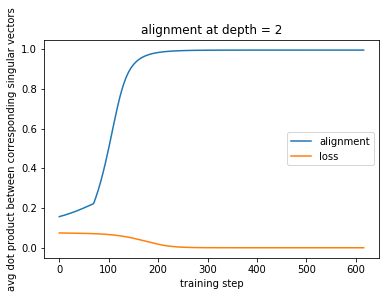

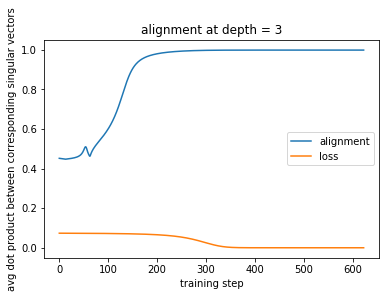

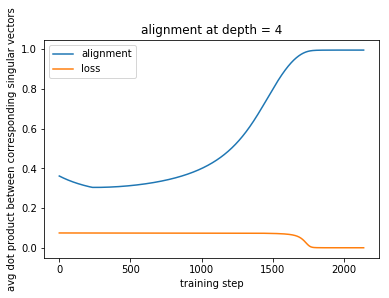

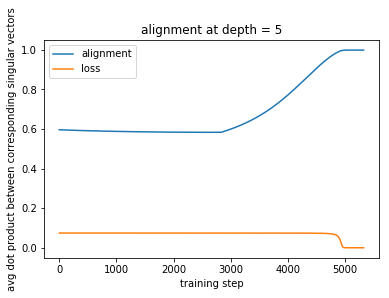

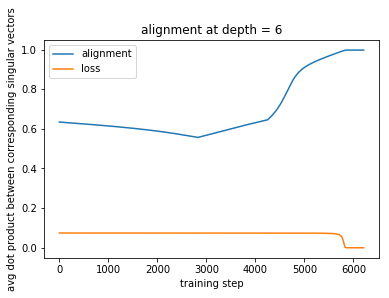

In [6]:
# PLOTS

for i in range(5):
    depth = i + 2
    plt.title("alignment at depth = " + str(depth))
    plt.plot(align[i], label = 'alignment')
    plt.plot(losses[i], label = 'loss')
    plt.ylabel("avg dot product between corresponding singular vectors")
    plt.xlabel("training step")
    plt.legend()
    plt.show()

# Circulant Layers

In [7]:
# Define Circulant Layers

def make_circulant(input, n):
    return torch.stack([torch.cat((input.narrow(0, n - i, i), input.narrow(0, 0, n - i))) for i in range(n)])

class CirculantLayer(train.BaseLayer):
    
    def __init__(self, n, init_val):
        super(CirculantLayer, self).__init__(n, init_val)
        self.init = self.init_val * torch.randn(self.n)
        self.weight = nn.Parameter(torch.tensor(self.init))
        
    def forward(self, input):
        new_matrix = torch.stack([torch.cat((input.narrow(0, i, n-i), input.narrow(0, 0, i))) for i in range(n)])
        return F.linear(self.weight, new_matrix)
    
    def weight_matrix(self):
        return make_circulant(self.weight, self.n)

class DeepCirculant(train.DeepNet):
    
    def __init__(self, n, depth):
        super(DeepCirculant, self).__init__(n, depth)
        self.layers = nn.ModuleList([CirculantLayer(n, self.init_val) for i in range(depth)])

### Experiments: Deep Circulant Networks
Shallow circulant networks learn high rank solutions.
Deep circulant networks have a single global minimum, which is the identity map. However, SGD often struggles to learn the last couple singular values, resulting in a lower rank solution.

In [8]:
n = 4
x = torch.rand(n)

In [9]:
all_svals = []
losses = []
nets = []
align = []
for depth in range(2, 4):
    print("\ndepth = " + str(depth))
    circ = DeepCirculant(n, depth)
    l, a, svals = train.train(circ, x, 1e-8)
    align.append(a)
    all_svals.append(svals)
    losses.append(l)
    nets.append(circ)


depth = 2
0.3872440457344055


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


0.00030495424289256334
0.00029953825287520885
0.0002941797429230064
0.00028767745243385434
0.0002787186822388321
0.00026573834475129843
0.00024695886531844735
0.000220756177441217
0.00018653979350347072
0.00014600557915400714
0.00010376866703154519
6.604116060771048e-05
3.752063639694825e-05
1.920319118653424e-05
9.01170824363362e-06
3.958609340770636e-06
1.6590124687354546e-06
6.733957320648187e-07
2.6771624561661156e-07
1.0498544611436955e-07
4.0828147973570594e-08
1.578706587679335e-08

depth = 3
0.3942195475101471
0.00029779973556287587
0.0002972218208014965
0.00029656296828761697
0.0002958024851977825
0.0002949070476461202
0.00029383390210568905
0.00029252973035909235
0.00029092124896124005
0.0002889061870519072
0.00028634542832151055
0.000283039320493117
0.0002787045086733997
0.0002729250700213015
0.00026509721647016704
0.00025433837436139584
0.00023938596132211387
0.00021856470266357064
0.0001899895869428292
0.00015255913604050875
0.00010820419265655801
6.415932148229331e-05
3.0

Plot of the eigenvalues:

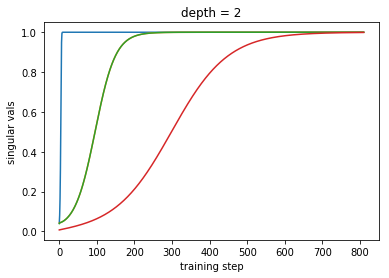

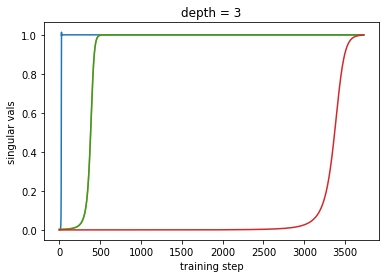

In [6]:
for i in range(2):
    depth = i + 2
    plt.title("depth = " + str(depth))
    plt.ylabel("singular vals")
    plt.xlabel("training step")
    for j in range(4):
        plt.plot([k[j] for k in all_svals[i]])
    plt.show()

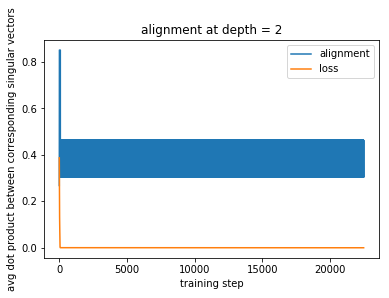

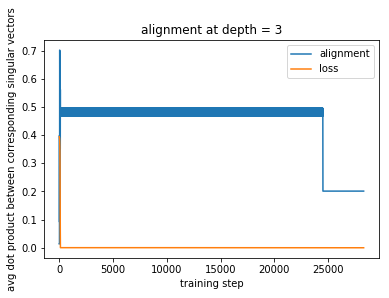

In [10]:
for i in range(2):
    depth = i + 2
    plt.title("alignment at depth = " + str(depth))
    plt.plot(align[i], label = 'alignment')
    plt.plot(losses[i], label = 'loss')
    plt.ylabel("avg dot product between corresponding singular vectors")
    plt.xlabel("training step")
    plt.legend()
    plt.show()

# Triangular Layers

In [8]:
class TriangularLayer(train.BaseLayer):
    
    def __init__(self, n, init_val):
        super(TriangularLayer, self).__init__(n, init_val)
        self.mask = torch.autograd.Variable(torch.tensor([[1. if i >= j else 0. for i in range(self.n)] for j in range(self.n)]), requires_grad = False)
        self.weight = nn.Parameter(torch.tensor(self.init))
        self.weight.data = self.weight.data*self.mask.data
        
    def forward(self, input):
        return F.linear(input, self.weight*self.mask)

class DeepTriangular(train.DeepNet):
    
    def __init__(self, n, depth):
        super(DeepTriangular, self).__init__(n, depth)
        self.init_val = 0.3
        self.layers = nn.ModuleList([TriangularLayer(n, self.init_val) for i in range(depth)])

### Experiments: Deep Triangular Networks

1 layer triangular networks learn the full rank solution.

What about deep triangular networks? It appears that for sufficient depth the global optima we find are low rank. Pretty dependent on initialization (small initialization for deep networks makes it very difficult to learn).

In [3]:
n = 4
x = torch.rand(n)

In [9]:
svd = []
all_svals = []
losses = []
nets = []
for depth in range(1, 7):
    print("\ndepth = " + str(depth))
    tri = DeepTriangular(n, depth)
    l, a, svals = train.train(tri, x, 1e-8)
    all_svals.append(svals)
    losses.append(l)
    nets.append(tri)
    svd.append(np.linalg.svd(tri.weight_matrix().detach().numpy())[1])
    


depth = 1
0.21820852160453796


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


0.0006100615137256682
0.0005019636009819806
0.00041301967576146126
0.00033983594039455056
0.0002796198532450944
0.00023007353593129665
0.00018930627265945077
0.00015576272562611848
0.00012816286471206695
0.00010545349505264312
8.676795550854877e-05
7.139344234019518e-05
5.874317139387131e-05
4.8334317398257554e-05
3.9769911381881684e-05
3.2723033655202016e-05
2.692477028176654e-05
2.215396671090275e-05
1.8228465705760755e-05
1.4998555343481712e-05
1.2340939974819776e-05
1.0154231858905405e-05
8.354975761903916e-06
6.874537575640716e-06
5.6564167607575655e-06
4.654163603845518e-06
3.8294970181596e-06
3.1509041491517564e-06
2.5926092348527163e-06
2.133235057044658e-06
1.7552505369167193e-06
1.4442455267271725e-06
1.1883307706739288e-06
9.777666036825394e-07
8.044950732255529e-07
6.619630426030199e-07
5.446671025310934e-07
4.481481994389469e-07
3.6876687659059826e-07
3.0342312129505444e-07
2.496681474895013e-07
2.0540095135856973e-07
1.6900112598250416e-07
1.3906709739330836e-07
1.1445054

KeyboardInterrupt: 

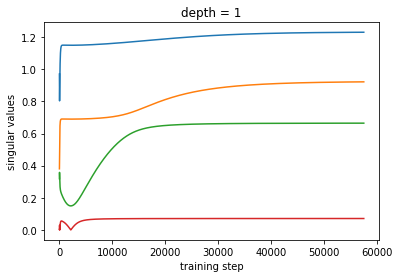

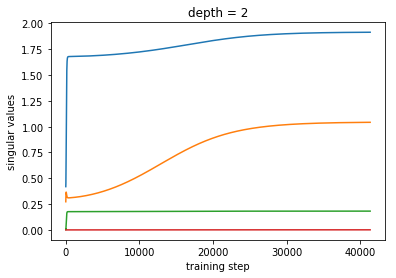

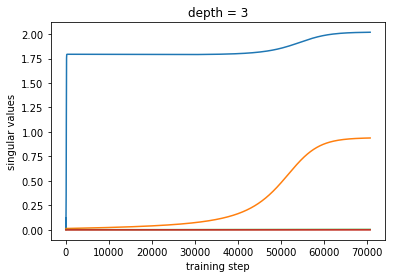

In [10]:
# plot singular vals per iteration

for i in range(3):
    plt.plot(all_svals[i])
    plt.xlabel("training step")
    plt.ylabel("singular values")
    plt.title("depth = " + str(i+1))
    plt.show()

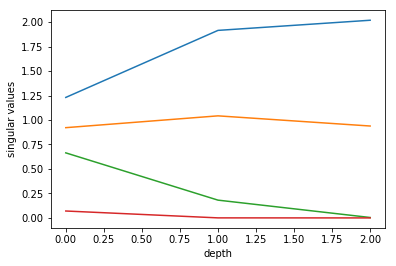

In [12]:
# plot final singular values as a function of depth
for i in range(n):
    plt.plot(range(3), [j[i] for j in svd])
plt.xlabel("depth")
plt.ylabel("singular values")
plt.show()

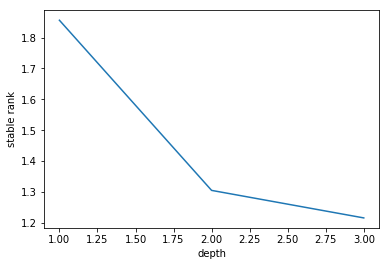

In [14]:
plt.plot(range(1, 4), [train.stable_rank(j) for j in svd])
plt.xlabel("depth")
plt.ylabel("stable rank")
plt.show()